In [1]:
import os
import sys
import json
import random

import pycocotools.coco as coco

DATA_PATH = '../data/lindenthal-camera-traps/lindenthal_coco/'

In [2]:
# load both train and test coco files
train_coco = coco.COCO(DATA_PATH + 'train.json')
test_coco = coco.COCO(DATA_PATH + 'test.json')

# print the number of images in each dataset
print('Number of images in train set:', len(train_coco.getImgIds()))
print('Number of images in test set:', len(test_coco.getImgIds()))

# print the number of annotations in each dataset
print('Number of annotations in train set:', len(train_coco.getAnnIds()))
print('Number of annotations in test set:', len(test_coco.getAnnIds()))

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of images in train set: 349
Number of images in test set: 62
Number of annotations in train set: 972
Number of annotations in test set: 62


In [3]:
# create an empty coco object
merged_coco = coco.COCO()

# load both train and test coco files
train_coco = coco.COCO(DATA_PATH + 'train.json')
test_coco = coco.COCO(DATA_PATH + 'test.json')
print(f'KEYS: {train_coco.dataset.keys()}')

# merge the two coco files
merged_coco.dataset = train_coco.dataset
merged_coco.dataset['images'].extend(test_coco.dataset['images'])
merged_coco.dataset['annotations'].extend(test_coco.dataset['annotations'])
merged_coco.createIndex()

# randomly sample images from the merged coco file for the validation set
val_portion = 0.15
val_size = int(val_portion * len(merged_coco.getImgIds()))
val_img_ids = random.sample(merged_coco.getImgIds(), val_size)
train_img_ids = [img['id'] for img in merged_coco.dataset['images'] if img['id'] not in val_img_ids]
random.shuffle(train_img_ids)

# create a new coco object for the validation set
val_coco = coco.COCO()
val_coco.dataset['images'] = [img for img in merged_coco.dataset['images'] if img['id'] in val_img_ids]
val_coco.dataset['annotations'] = [ann for ann in merged_coco.dataset['annotations'] if ann['image_id'] in val_img_ids]
val_coco.dataset['categories'] = merged_coco.dataset['categories']
val_coco.dataset['info'] = merged_coco.dataset['info']
val_coco.dataset['licenses'] = merged_coco.dataset['licenses']
val_coco.createIndex()

# create a train coco object with the remaining images
train_coco = coco.COCO()
train_coco.dataset['images'] = [img for img in merged_coco.dataset['images'] if img['id'] in train_img_ids]
train_coco.dataset['annotations'] = [ann for ann in merged_coco.dataset['annotations'] if ann['image_id'] in train_img_ids]
train_coco.dataset['categories'] = merged_coco.dataset['categories']
train_coco.dataset['info'] = merged_coco.dataset['info']
train_coco.dataset['licenses'] = merged_coco.dataset['licenses']
train_coco.createIndex()

# dump the train and val files into json files
with open(DATA_PATH + 'train_merged.json', 'w') as f:
    # remove the data inside the file
    f.seek(0)
    json.dump(train_coco.dataset, f)

with open(DATA_PATH + 'val_merged.json', 'w') as f:
    # remove the data inside the file
    f.seek(0)
    json.dump(val_coco.dataset, f)


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
KEYS: dict_keys(['annotations', 'images', 'licenses', 'info', 'categories'])
creating index...
index created!
creating index...
index created!
creating index...
index created!


In [6]:
# load both train and test coco files
train_coco = coco.COCO(DATA_PATH + 'train_merged.json')
test_coco = coco.COCO(DATA_PATH + 'val_merged.json')

# print the number of images in each dataset
print('Number of images in merged train set:', len(train_coco.getImgIds()))
print('Number of images in merged test set:', len(test_coco.getImgIds()))

# print the number of annotations in each dataset
print('Number of annotations in merged train set:', len(train_coco.getAnnIds()))
print('Number of annotations in merged test set:', len(test_coco.getAnnIds()))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Number of images in merged train set: 350
Number of images in merged test set: 61
Number of annotations in merged train set: 891
Number of annotations in merged test set: 143


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


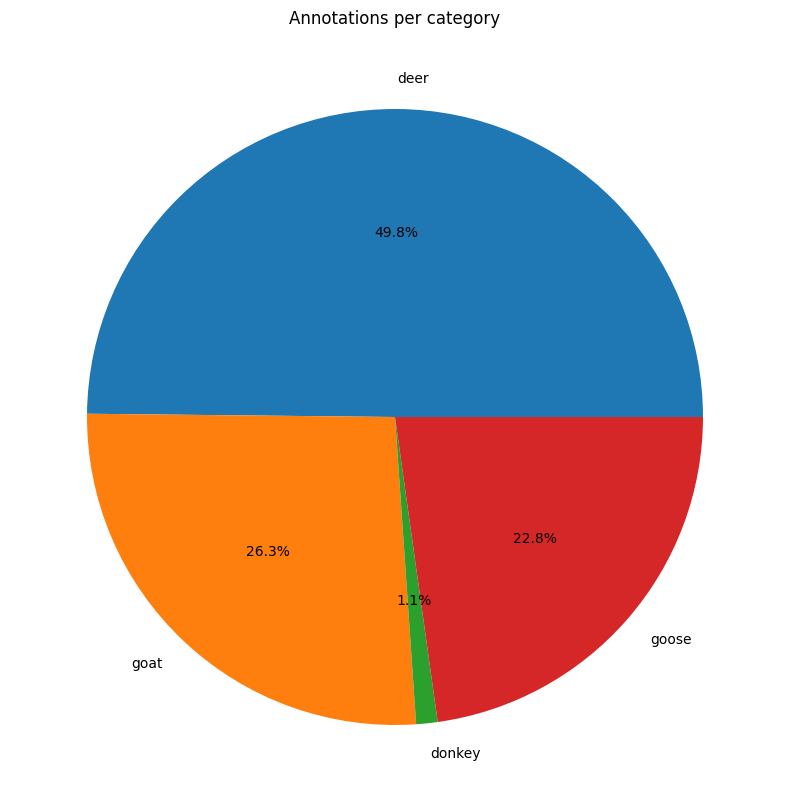

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


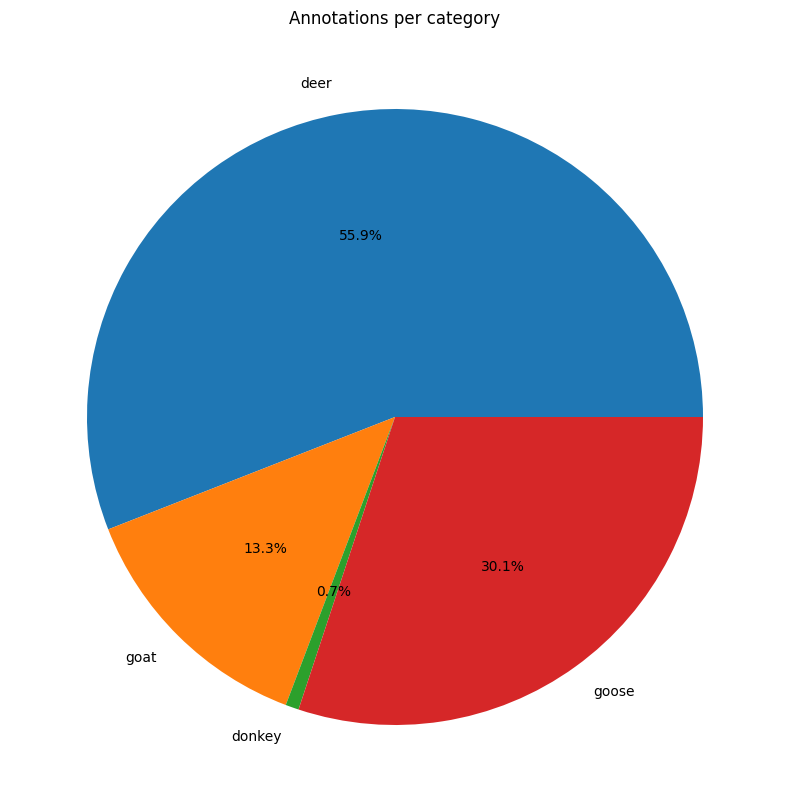

In [3]:
# plot the amount of anotations per category in the new datasets
import matplotlib.pyplot as plt
import numpy as np

train_coco = coco.COCO(DATA_PATH + 'train_merged.json')
cat_ids = train_coco.getCatIds()
cats = train_coco.loadCats(cat_ids)
cat_names = [cat['name'] for cat in cats]

anns = train_coco.dataset['annotations']
cat_counts = [0] * len(cat_ids)
for ann in anns:
    cat_counts[ann['category_id']-1] += 1

plt.figure(figsize=(20, 10))
plt.pie(cat_counts, labels=cat_names, autopct='%1.1f%%')
plt.title('Annotations per category')
plt.show()


val_coco = coco.COCO(DATA_PATH + 'val_merged.json')
cat_ids = val_coco.getCatIds()
cats = val_coco.loadCats(cat_ids)
cat_names = [cat['name'] for cat in cats]

anns = val_coco.dataset['annotations']
cat_counts = [0] * len(cat_ids)
for ann in anns:
    cat_counts[ann['category_id']-1] += 1

plt.figure(figsize=(20, 10))
plt.pie(cat_counts, labels=cat_names, autopct='%1.1f%%')
plt.title('Annotations per category')
plt.show()
